In [79]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Traces simulator v2

In [216]:
N_USERS = 50

In [217]:
%autoreload
from tracer.simulator import TraceSimulator

sim = TraceSimulator(
    number_towers=400,
    number_users=N_USERS,
    number_cycles=24,
    expander=1,
    sigma=0.0005,
    vel_friction=0.9,
    method='distance_square',
    distance_power=20,
#     verbose=True,
)

## Generate random user traces

In [218]:
sim.generate()

In [219]:
sim.traces.shape

(50, 24)

## Plot generated results

### Towers positions

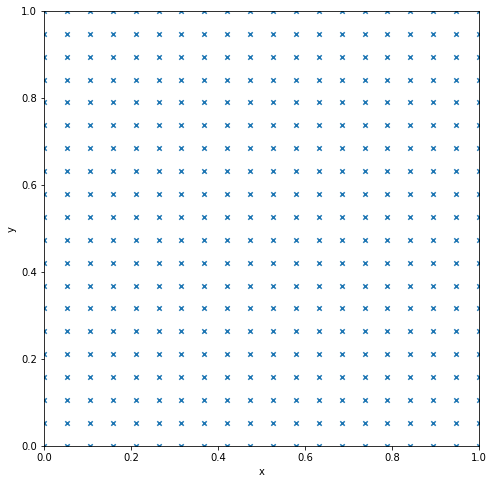

In [220]:
sim.towers_manager.plot_towers(annotate_towers=False);

### User trace

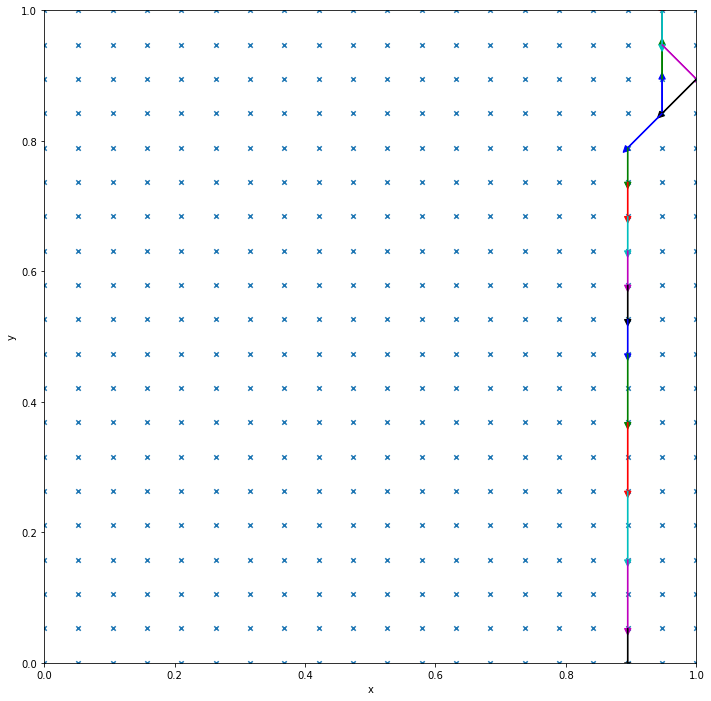

In [221]:
sim.towers_manager.plot_user_trace(sim.traces[2], annotate_towers=False)

In [222]:
sim.aggregated_data.shape

(24, 400)

# Trajectory recovery

In [223]:
%autoreload
import numpy as np
from tracer.recover import TrajectoryRecovery

tr = TrajectoryRecovery(
    number_users=N_USERS,
    towers=sim.towers,
    aggregated_data=sim.aggregated_data,
    vel_friction=0.9
)

In [224]:
tr.build_distribution_matrix()

In [225]:
tr.L.shape

(24, 50)

## Recover trajectories

Recovers the trajectories for each anonymous user and the costs on each step

In [240]:
res = tr.trajectory_recovery_generator()

In [242]:
# res['recovered_costs']

In [238]:
# tr.towers_manager.plot_user_trace(res['recovered_trajectories'][:, 1])

## Map recovered trajectories with real trajectories

global_accuracy = $\frac{1}{N} \sum_{i=1}^N \frac{|T_i \cap Y_i|}{|Y_i|}$

In [228]:
mapping, global_accuracy, acc = tr.map_traces(sim.traces)

In [237]:
global_accuracy

0.6441666666666667

For each recovered trajectory, see how many elements it has in common with the real one

In [236]:
dict(enumerate(acc))

{0: 21,
 1: 23,
 2: 23,
 3: 11,
 4: 10,
 5: 24,
 6: 19,
 7: 13,
 8: 14,
 9: 18,
 10: 22,
 11: 15,
 12: 15,
 13: 9,
 14: 15,
 15: 14,
 16: 15,
 17: 17,
 18: 17,
 19: 8,
 20: 13,
 21: 16,
 22: 17,
 23: 11,
 24: 13,
 25: 17,
 26: 24,
 27: 24,
 28: 16,
 29: 14,
 30: 13,
 31: 8,
 32: 10,
 33: 11,
 34: 15,
 35: 15,
 36: 24,
 37: 12,
 38: 19,
 39: 14,
 40: 20,
 41: 16,
 42: 12,
 43: 14,
 44: 16,
 45: 10,
 46: 9,
 47: 22,
 48: 11,
 49: 14}

User 26 mapped to simulated trace 20


<Figure size 432x288 with 0 Axes>

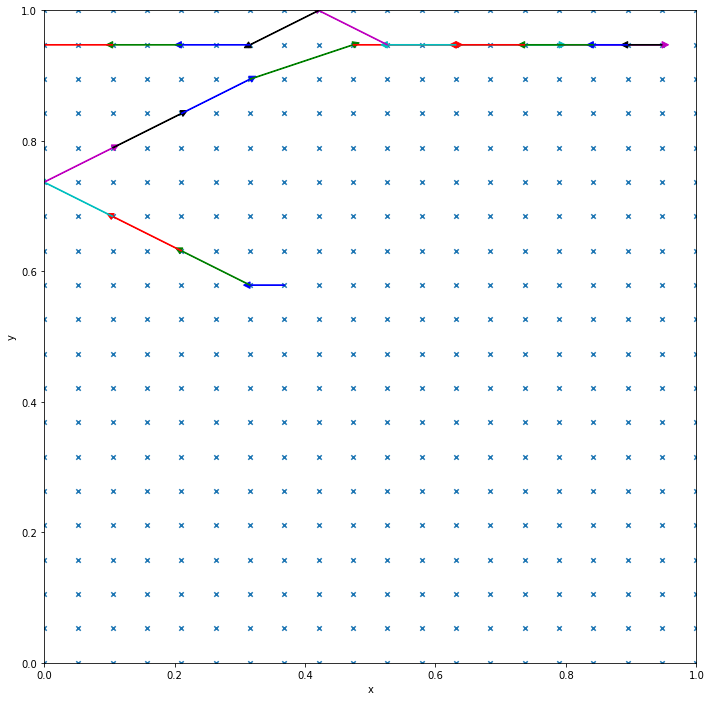

<Figure size 432x288 with 0 Axes>

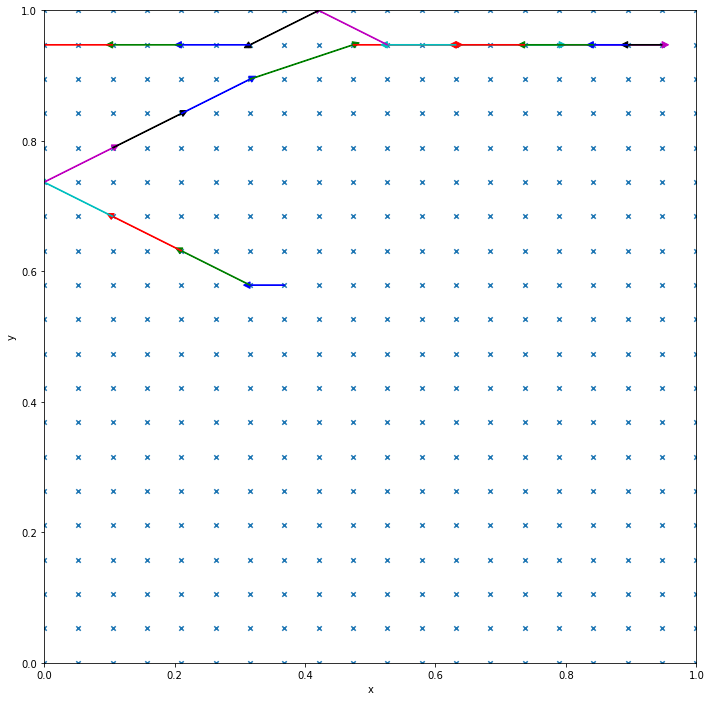

In [234]:
user = 26
recovered_trace = tr.S.T[user]
print(f'User {user} mapped to simulated trace {mapping[user]}')
mapped_trace = sim.traces[mapping[user]]

import matplotlib.pyplot as plt

plt.figure()
tr.towers_manager.plot_user_trace(recovered_trace, annotate_towers=False)

plt.figure()
tr.towers_manager.plot_user_trace(mapped_trace, annotate_towers=False)